# Lab08 Machine Learning
## Stephen Blackwell
### 3/3/20

## Part A

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
%matplotlib inline

## Part B-C

In [6]:
video_store = pd.read_csv("Video_Store_2.csv", sep=',')
video_store.head(5)

,Cust ID,Gender,Income,Age,Rentals,Avg Per Visit,Genre,Incidentals
0,1,M,45000,25,32,2.5,Action,Yes
1,2,F,54000,33,12,3.4,Drama,No
2,3,F,32000,20,42,1.6,Comedy,No
3,4,F,59000,70,16,4.2,Drama,Yes
4,5,M,37000,35,25,3.2,Action,Yes


## Part D

In [48]:
def entropyCategory(n1 = 0, nTot = 0):
    p = n1 / nTot
    return p * math.log(p, 2)

def entropy(inp = np.array):
    entropy = 0
    categoryCounts = {}
    for item in inp:
        if item not in categoryCounts.keys():
            categoryCounts[item] = 1
        else:
            categoryCounts[item] = categoryCounts[item] + 1
    for key in categoryCounts.keys():
        entropy = entropy - entropyCategory(categoryCounts[key], len(inp))
    return entropy

## Part E

## SubPart I

In [50]:
print(entropy(np.array(['Yes', 'No', 'Yes', 'No']))) # 1.0

1.0


## SubPart II

In [49]:
print(entropy(np.array(['Yes', 'Yes', 'Yes', 'No'])))  # 0.8112781244591328

0.8112781244591328


## SubPart III

In [51]:
print(entropy(np.array(['Yes', 'Yes', 'Yes', 'Yes'])))  # 0.0


0.0


## Part F

In [53]:
print(entropy(video_store['Incidentals']))  # 0.9988

0.9988455359952018


## Part G

## SubPart I

In [62]:
action = video_store[video_store["Genre"] == "Action"]
comedy = video_store[video_store["Genre"] == "Comedy"]
drama = video_store[video_store["Genre"] == "Drama"]

## SubPart II

In [68]:
actionE = entropySet(action['Incidentals'])
comedyE = entropySet(comedy['Incidentals'])
dramaE = entropySet(drama['Incidentals'])

print("Action: ", actionE)
print("Comedy: ", comedyE)
print("Drama: ", dramaE)

Action:  0.9644111117521389
Comedy:  0.43839067638965634
Drama:  1.0


## SubPart III

In [70]:
wAction = len(action) / len(video_store)
wComedy = len(comedy) / len(video_store)
wDrama = len(drama) / len(video_store)


InformationGain = entropySet(video_store['Incidentals']) - ((wAction * actionE) + (wComedy * comedyE) + (wDrama * dramaE))
print(InformationGain)

0.16413617892713817


## Part H

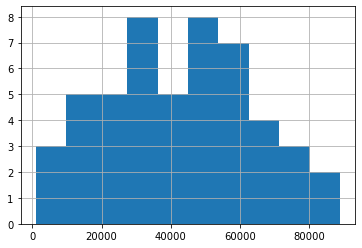

In [71]:
video_store['Income'].hist(bins=10)

In [79]:
video_store['Income_bins'] = pd.qcut(video_store['Income'], 2, labels=["low", "high"])

In [81]:
high = video_store[video_store["Income_bins"] == "high"]
low = video_store[video_store["Income_bins"] == "low"]

In [85]:
highE = entropySet(high['Incidentals'])
lowE = entropySet(low['Incidentals'])

wHigh = len(high) / len(video_store)
wLow = len(low) / len(video_store)


InformationGainIncome = entropySet(video_store['Incidentals']) - ((wHigh * highE) + (wLow * lowE))
print(InformationGainIncome)

0.010542530768122838
